**Author:** *Johannes Peter Knoll*

# Introduction

This Notebook is supposed to demonstrate the results of all calculations that are made in
the main.py file

In [1]:
# The autoreload extension allows you to tweak the code in the imported modules
# and rerun cells to reflect the changes.
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Parameters and Files

In [2]:
import main

import random
import numpy as np

In [3]:
TEMPORARY_PICKLE_DIRECTORY = main.TEMPORARY_PICKLE_DIRECTORY
TEMPORARY_FIGURE_DIRECTORY = main.TEMPORARY_FIGURE_DIRECTORY

PREPARATION_DIRECTORY = main.PREPARATION_DIRECTORY
ADDITIONALS_DIRECTORY = main.ADDITIONALS_DIRECTORY

# ECG Validation
ECG_CALIBRATION_DATA_PATH = main.ECG_CALIBRATION_DATA_PATH
ECG_VALIDATION_THRESHOLDS_PATH = main.ECG_VALIDATION_THRESHOLDS_PATH
VALID_ECG_REGIONS_NAME = main.VALID_ECG_REGIONS_NAME

# R peak detection
CERTAIN_RPEAKS_NAME = main.CERTAIN_RPEAKS_NAME
UNCERTAIN_PRIMARY_RPEAKS_NAME = main.UNCERTAIN_PRIMARY_RPEAKS_NAME
UNCERTAIN_SECONDARY_RPEAKS_NAME = main.UNCERTAIN_SECONDARY_RPEAKS_NAME

# MAD calculation
MAD_VALUES_NAME = main.MAD_VALUES_NAME

In [4]:
parameters = main.parameters

# Preparation

## Calculating Valid ECG Regions:

Go ahead and change the file_name and xlim to see different data in different intervals!  
Plotting Time: up to 35s (it's a lot of data)

ATTENTION: Valid ECG Regions must have been compiled first (see main.py - PREPARATION SECTION)  

(Valid / Total) Regions Ratio: 41.580000 %


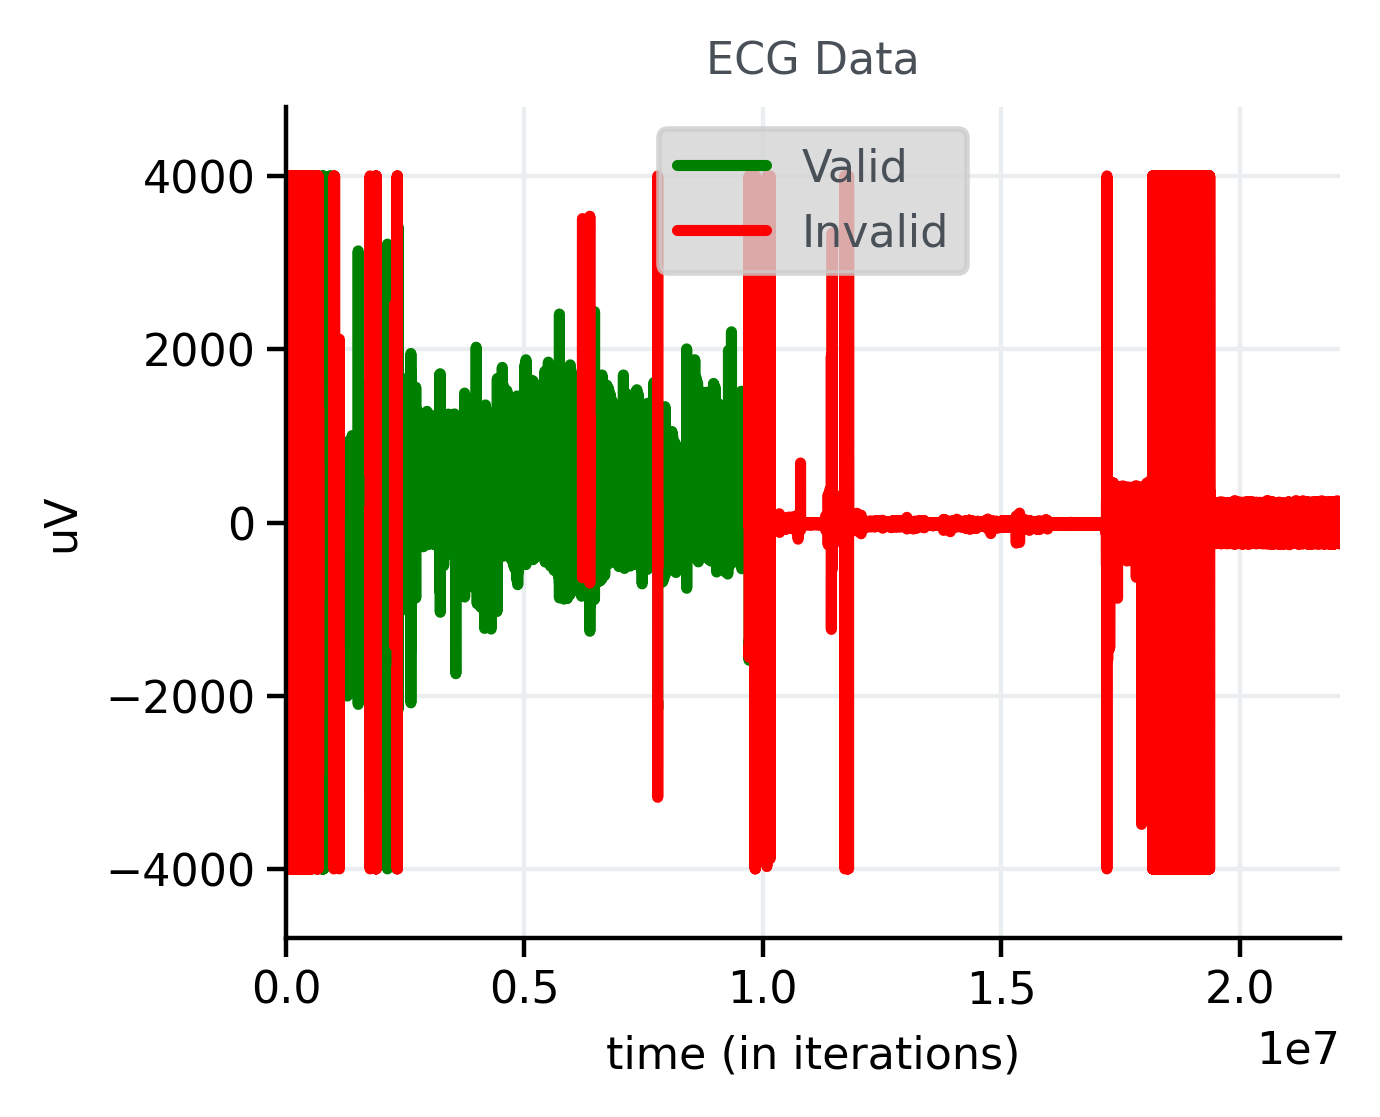

In [10]:
# choose a random file
data_directory = "Data/"
file_data_name = "Somnowatch_Messung.edf"

valid_regions_path = PREPARATION_DIRECTORY + data_directory + VALID_ECG_REGIONS_NAME
file_data_path = data_directory + file_data_name

# load the valid regions
valid_regions_generator = main.load_from_pickle(valid_regions_path)

# load the ECG data
ECG, frequency = main.read_edf.get_data_from_edf_channel(
    file_path = file_data_path,
    possible_channel_labels = parameters["ecg_keys"],
    physical_dimension_correction_dictionary = parameters["physical_dimension_correction_dictionary"]
    )

valid_regions_ratio = main.check_data.valid_total_ratio(sigbufs, valid_regions_dict[file_name], parameters["ecg_key"])
print("(Valid / Total) Regions Ratio: %f %%" % (round(valid_regions_ratio, 4)*100))

total_length = len(sigbufs[parameters["ecg_key"]])
x_lim = [int(0*total_length), int(1*total_length)]

main.plot_helper.plot_valid_regions(
    sigbufs, 
    valid_regions_dict[file_name], 
    parameters["ecg_key"], 
    xlim = x_lim
    )

## Calculating R peaks

The calculated R peaks will be plotted in a random interval. Of course you can change the
interval size or even define the interval yourself. Go ahead and look at a few different intervals
for different files!

ATTENTION: Valid ECG Regions and R peaks must have been compiled first (see main.py - PREPARATION SECTION)

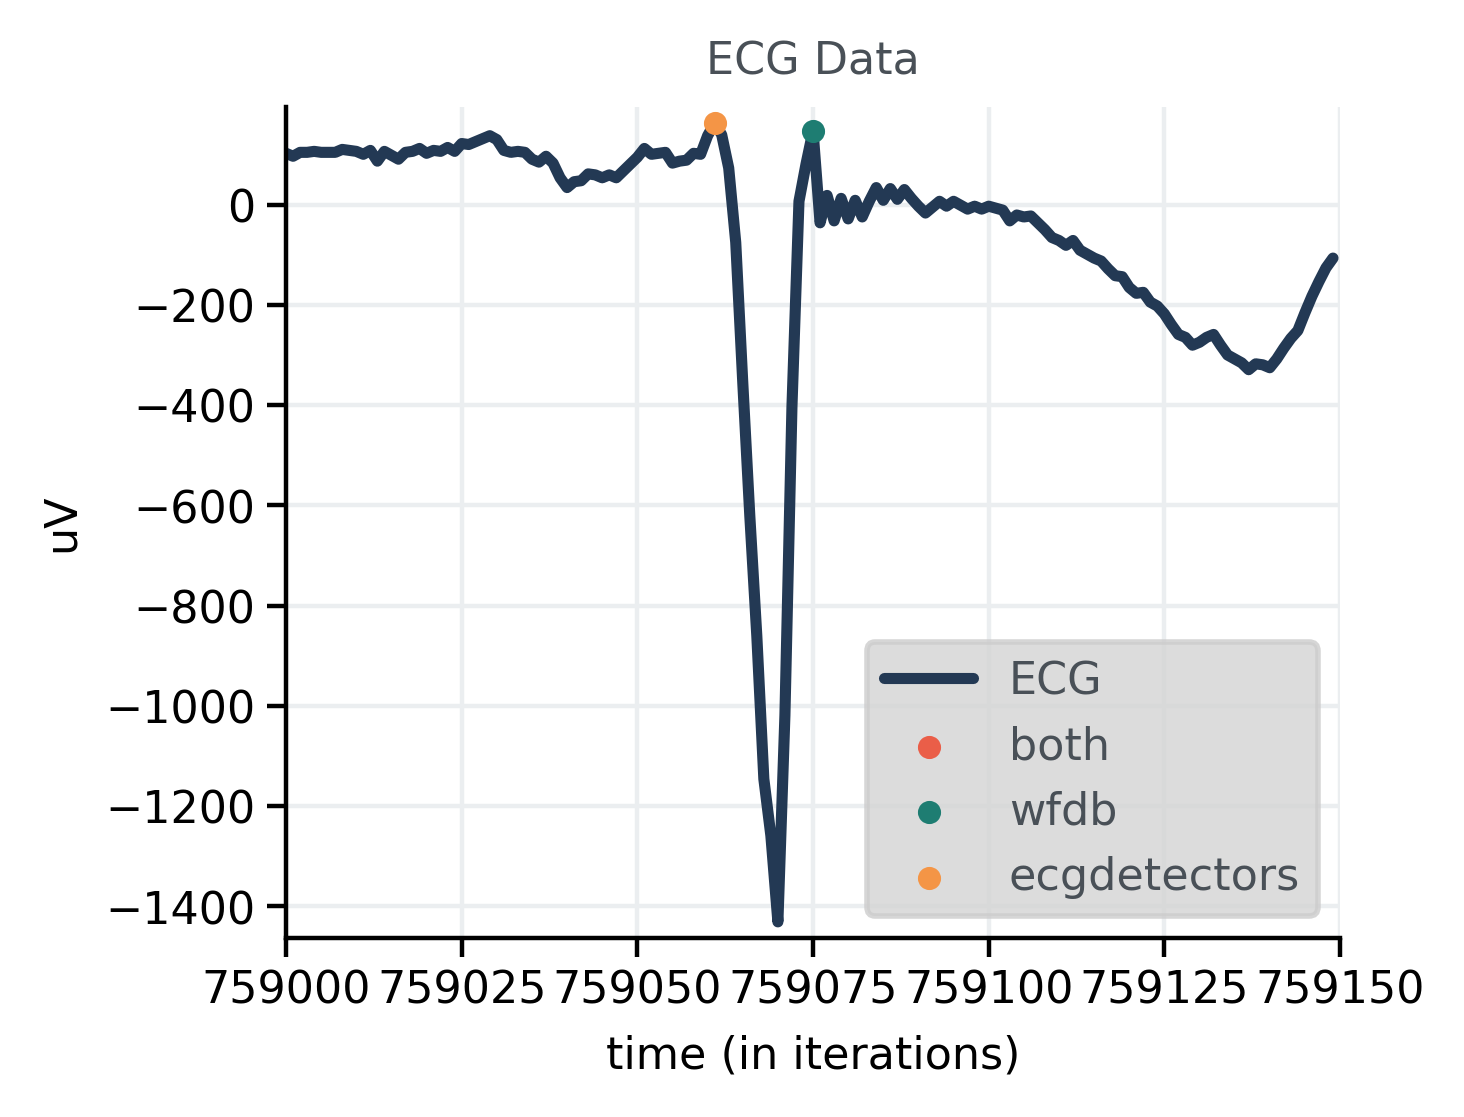

In [13]:
file_name = "Somnowatch_Messung.edf"
interval_size = 2560

# choose random valid interval
valid_regions_dict = main.load_from_pickle(VALID_ECG_REGIONS_PATH)
this_valid_regions = valid_regions_dict[file_name]
random_valid_region = random.choice(this_valid_regions)
random_valid_region_start = random.randint(random_valid_region[0], random_valid_region[1] - interval_size)

# x_lim = [708000, 708500]
# x_lim = [1358000, 1359000]
x_lim = [random_valid_region_start, random_valid_region_start + interval_size]
x_lim = [759000, 759150]

sigbufs, sigfreqs, sigdims, duration = main.read_edf.get_edf_data(DATA_DIRECTORY + file_name)
certain_rpeaks = main.load_from_pickle(CERTAIN_RPEAKS_PATH)
uncertain_primary_rpeaks = main.load_from_pickle(UNCERTAIN_PRIMARY_RPEAKS_PATH)
uncertain_secondary_rpeaks = main.load_from_pickle(UNCERTAIN_SECONDARY_RPEAKS_PATH)
name_primary = parameters["rpeak_name_primary"]
name_secondary = parameters["rpeak_name_secondary"]

main.plot_helper.plot_rpeak_detection(
    sigbufs, 
    parameters["ecg_key"],
    certain_rpeaks[file_name], 
    uncertain_primary_rpeaks[file_name], 
    uncertain_secondary_rpeaks[file_name],
    name_primary,
    name_secondary, 
    xlim = x_lim)

## Calculating MAD Values

The calculated MAD Values will be plotted in a random interval. Of course you can change the
interval size or even define the interval yourself. Go ahead and look at a few different intervals
for different files!

ATTENTION: MAD Values must have been compiled first (see main.py - PREPARATION SECTION)

MAD time period: 10 seconds


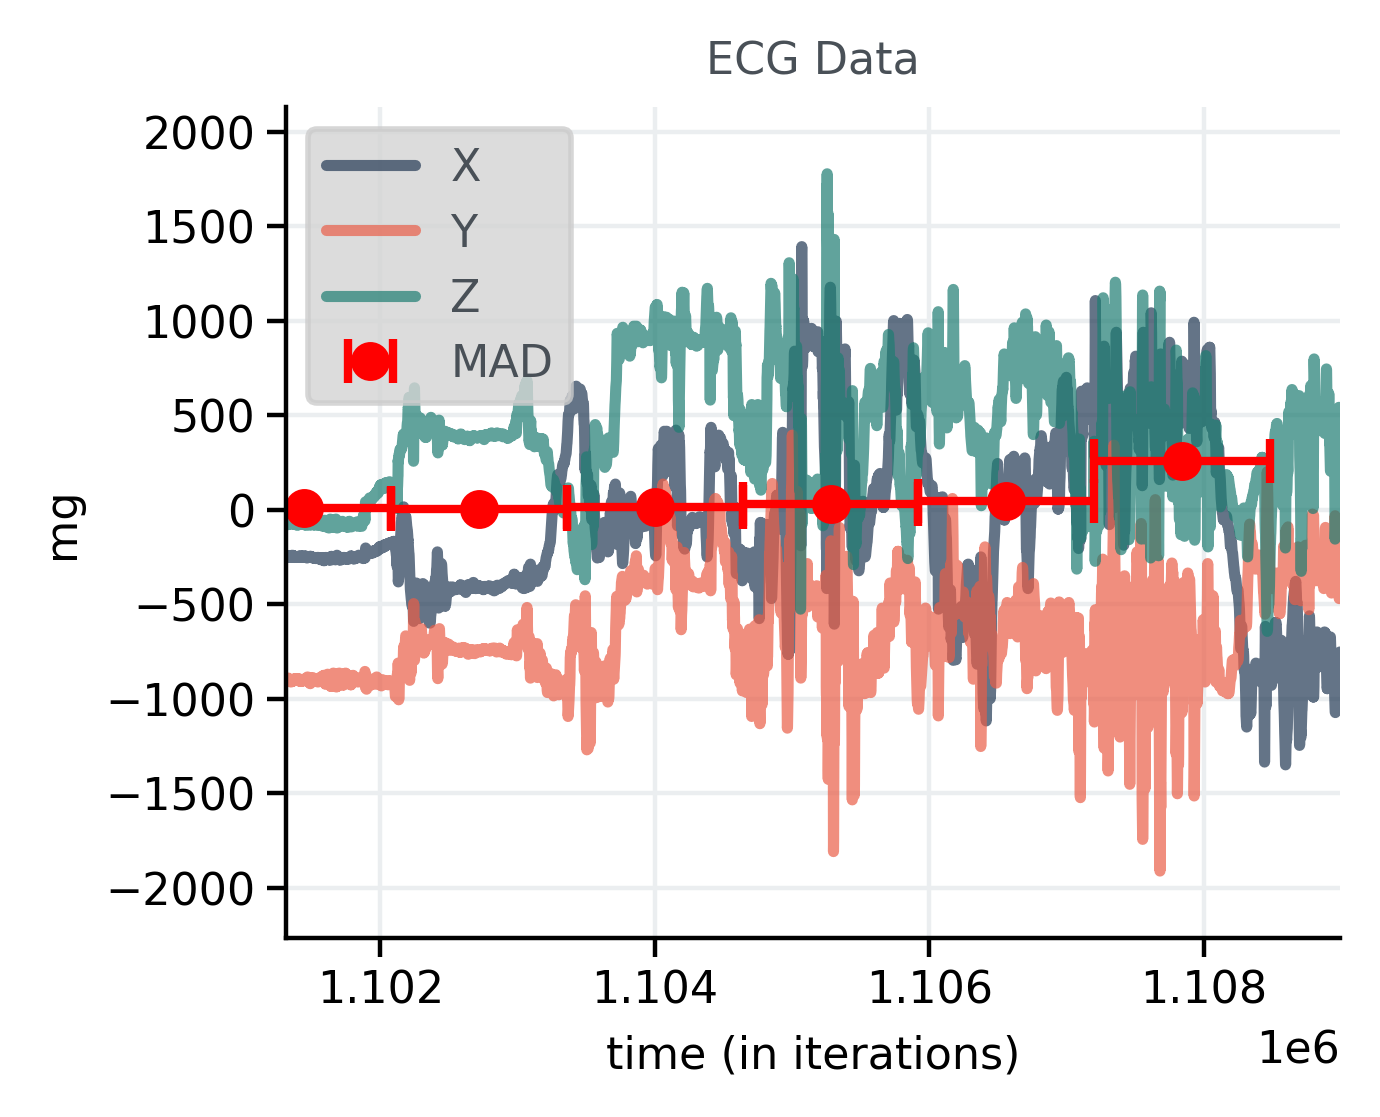

In [7]:
file_name = "Somnowatch_Messung.edf"
interval_size = 7680 # 60 seconds for 128 Hz

# load data and choose random valid interval
sigbufs, sigfreqs, sigdims, duration = main.read_edf.get_edf_data(DATA_DIRECTORY + file_name)
total_length = len(sigbufs[parameters["wrist_acceleration_keys"][0]])
frequency = sigfreqs[parameters["wrist_acceleration_keys"][0]]

random_valid_region_start = random.randint(0, total_length - interval_size)
x_lim = [random_valid_region_start, random_valid_region_start + interval_size]
lower_bound = 1101312
x_lim = [lower_bound, lower_bound + interval_size]

MAD_values = main.load_from_pickle(MAD_VALUES_PATH)

# check if MAD values might have been calculated for a different time period
if int(total_length / (len(MAD_values[file_name])*frequency)) != parameters["mad_time_period_seconds"]:
    print("MAD values might have been calculated for a different time period. Changing value:")
    this_mad_time_period_seconds = int(total_length / (len(MAD_values[file_name])*frequency))
else:
    this_mad_time_period_seconds = parameters["mad_time_period_seconds"]

print("MAD time period: %d seconds" % this_mad_time_period_seconds)

main.plot_helper.plot_MAD_values(
    sigbufs,
    sigfreqs,
    parameters["wrist_acceleration_keys"], 
    MAD_values[file_name],
    mad_time_period_seconds = parameters["mad_time_period_seconds"], 
    xlim = x_lim
    )